In [1]:
#Funds to analyze 
#XLRE, XLF, XLK, BTC
#XLRE, XLF

#import yfinance as yahooFinance
#import datetime

# startDate , as per our convenience we can modify
#startDate = datetime.datetime(2008, 1, 1)
 
# endDate , as per our convenience we can modify
#endDate = datetime.datetime(2022, 12, 20)

#GetFacebookInformation = yahooFinance.Ticker("XLRE")
#print(GetFacebookInformation.history(start=startDate,
                                  #   end=endDate))



In [2]:
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np


%matplotlib inline

In [3]:
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)
print(type(alpaca_api_key))
print(type(alpaca_secret_key))


<class 'str'>
<class 'str'>


In [5]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["XLRE", "XLF","XLK"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date).df
df_portfolio


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

XLRE = df_portfolio[df_portfolio['symbol']=='XLRE'].drop('symbol', axis=1)
XLF = df_portfolio[df_portfolio['symbol']=='XLF'].drop('symbol', axis=1)
XLK = df_portfolio[df_portfolio['symbol']=='XLK'].drop('symbol', axis=1)
#SP500 = df_portfolio[df_portfolio['symbol']=='^GSPC'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

df_portfolio = pd.concat([XLRE, XLF, XLK], axis=1, keys=["XLRE","XLF","XLK"])

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()

XLRE                                    \
                              open     high      low    close volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  31.1900  31.8088  31.1900  31.7100   3766   
2016-05-03 04:00:00+00:00  31.6050  31.8699  31.6050  31.8699   4691   
2016-05-04 04:00:00+00:00  31.6747  32.3300  31.6747  32.3299   1663   
2016-05-05 04:00:00+00:00  32.3400  32.3700  32.3047  32.3599   2650   
2016-05-06 04:00:00+00:00  32.2560  32.6680  32.2348  32.5300   3761   

                                                    XLF                   ...  \
                          trade_count       vwap   open     high     low  ...   
timestamp                                                                 ...   
2016-05-02 04:00:00+00:00          16  31.614259  23.33  23.5500  23.275  ...   
2016-05-03 04:00:00+00:00          22  31.802486  23.25  23.2700  23.020  ...   
2016-05-04 04:00:00+00:00          11  32.222387  22.95  23.1550  22.930  ...   
2016-05-05 04:00:00+00:00          34  32.348643  23.09  23.1775  22.970  ...   
2016-05-06 04:00:00+00:00          24  32.486150  22.86  23.1400  22.860  ...   

                                                              XLK          \
                             volume trade_count       vwap   open    high   
timestamp                                                                   
2016-05-02 04:00:00+00:00  35389630       39593  23.481169  42.22  42.485   
2016-05-03 04:00:00+00:00  35858748       49319  23.142931  42.15  42.240   
2016-05-04 04:00:00+00:00  37747077       41799  23.022753  41.86  42.040   
2016-05-05 04:00:00+00:00  38215354       37084  23.049344  42.04  42.135   
2016-05-06 04:00:00+00:00  31652361       39891  23.017640  41.76  42.250   

                                                                          
                             low  close    volume trade_count       vwap  
timestamp                                                                 
2016-05-02 04:00:00+00:00  42.04  42.44  12552678       33900  42.246906  
2016-05-03 04:00:00+00:00  41.91  42.05  12531192       26818  42.065738  
2016-05-04 04:00:00+00:00  41.80  41.92  11245655       29739  41.929356  
2016-05-05 04:00:00+00:00  41.84  41.94  13559918       22681  41.951480  
2016-05-06 04:00:00+00:00  41.76  42.25   9229886       27763  42.043873  

[5 rows x 21 columns]

In [6]:
df_portfolio.isnull().sum()

XLRE  open           0
      high           0
      low            0
      close          0
      volume         0
      trade_count    0
      vwap           0
XLF   open           0
      high           0
      low            0
      close          0
      volume         0
      trade_count    0
      vwap           0
XLK   open           0
      high           0
      low            0
      close          0
      volume         0
      trade_count    0
      vwap           0
dtype: int64

In [7]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.33,.33,.33],
    num_simulation=500,
    num_trading_days=252*30
)

MC_even.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gamez\Documents\fintech\Project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011313,1.001817,1.006547,1.008459,0.993683,0.994278,1.008806,1.008910,1.006916,0.991515,...,0.996760,1.010001,0.992624,1.001951,0.990786,1.011973,1.002856,1.004960,1.013542,1.006449
2,1.006794,0.992120,1.028031,1.007698,0.987049,1.000872,1.015043,1.014079,1.009345,1.000748,...,0.998930,1.034315,0.983349,1.014683,0.993405,1.013724,0.996414,1.007428,0.995414,1.025811
3,1.003960,0.985318,1.024179,1.003077,0.992527,1.007845,1.022940,1.014560,1.023972,0.997083,...,1.013084,1.035382,0.972574,1.002635,0.996318,1.034951,0.998324,1.004424,0.991473,1.020239
4,1.005921,0.985911,1.042418,1.019350,0.982822,1.006467,1.017525,1.012114,1.022437,1.004798,...,1.015248,1.038909,0.958992,0.988331,0.997233,1.043982,1.002118,1.015836,1.004666,1.013665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,95.211255,125.250163,59.653963,97.687433,64.852645,87.710569,101.718215,46.506499,16.228380,144.462063,...,13.957974,100.164481,261.645541,49.474244,167.216843,42.846060,143.111722,75.556669,50.652191,58.580575
7557,95.547644,125.543457,59.117634,98.581778,65.448007,86.907986,102.394648,46.928565,16.309402,145.581590,...,13.797125,101.545362,263.757016,49.677088,168.351936,42.796966,142.577021,76.078153,50.249724,59.358368
7558,95.431658,124.072595,59.473280,97.624023,65.146818,86.306643,101.064412,47.123280,16.350885,146.550338,...,13.828284,101.051775,264.360824,49.986607,166.481095,42.516252,143.419969,76.768155,50.089910,59.663754
7559,97.604994,126.000631,59.578733,98.312062,65.054843,87.222353,101.576448,47.075791,16.421942,146.268872,...,14.028372,100.580430,269.035487,49.205164,165.558946,42.794611,143.109994,77.847223,50.124535,59.268633


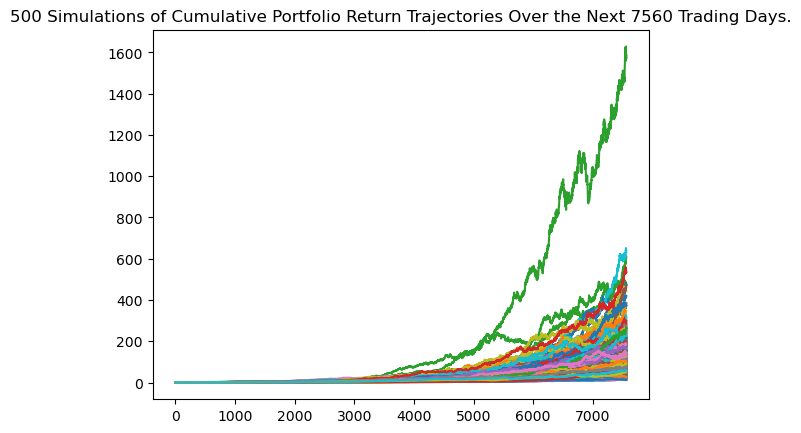

In [8]:
line_plot = MC_even.plot_simulation()

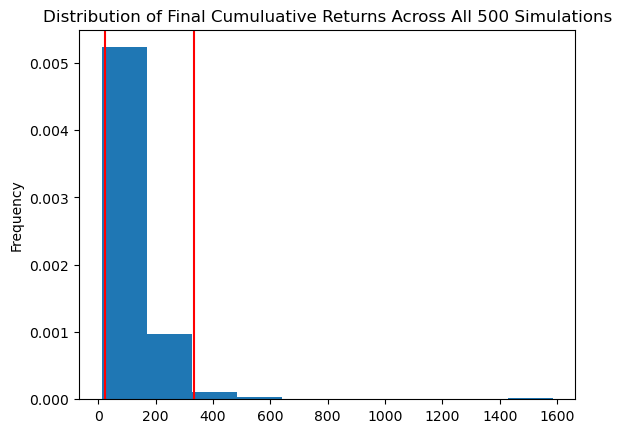

In [9]:
dist_plot = MC_even.plot_distribution()

In [10]:
tbl_even = MC_even.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_even)

count            500.000000
mean             111.560476
std              108.460949
min               12.340524
25%               51.020104
50%               83.937332
75%              141.064562
max             1584.000336
95% CI Lower      22.298806
95% CI Upper     332.954521
Name: 7560, dtype: float64


In [11]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower= round(tbl_even[8]*initial_investment,2)
ci_upper= round(tbl_even[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $445976.11 and $6659090.41


In [12]:
# XLRE, XLF, XLK ----- 60, 20, 20 
MC_XLRE_60 = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.60,.20,.20],
    num_simulation=500,
    num_trading_days=252*30
)

MC_XLRE_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gamez\Documents\fintech\Project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997563,0.984837,0.993709,1.001881,0.986199,0.992939,0.995093,1.012772,0.990210,1.004825,...,1.007945,0.985403,0.985868,0.987454,1.015945,0.991847,0.987047,0.983420,0.992939,1.003096
2,1.011692,0.994181,1.003621,1.008492,0.988558,0.988343,0.992648,1.027239,0.997457,1.006834,...,1.017615,0.986773,0.995381,0.983555,1.011554,0.994311,0.988250,0.987400,1.000746,0.993839
3,1.007891,0.997694,1.003312,1.010561,0.985852,0.988684,0.989621,1.025669,1.012084,1.008060,...,0.999406,0.984466,0.988607,0.985084,1.019404,0.996020,0.987263,0.995620,1.002680,0.997075
4,1.017317,1.003564,1.005452,1.004158,0.981967,0.984692,0.989847,1.014275,1.007472,0.999965,...,1.011753,0.974430,0.981878,0.990484,1.039090,1.007354,0.987184,0.988656,1.004904,0.992549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.662360,30.387795,24.700937,47.836158,13.076810,24.493382,15.397231,17.698865,53.985746,119.718201,...,41.195686,103.126199,66.844069,44.027612,80.530971,17.591917,55.416912,9.142329,7.064817,14.225549
7557,10.681538,30.522838,24.502671,48.471396,12.763306,24.564078,15.246117,17.661676,54.956130,121.613317,...,41.344237,103.644076,67.162188,43.238655,81.063233,17.509831,55.339628,9.150097,7.148548,14.339046
7558,10.755258,30.514307,24.224292,48.180780,12.631164,24.842001,15.329776,17.741826,55.334836,121.375413,...,41.077578,102.665084,67.230103,43.301141,81.079089,17.458645,54.761711,9.116368,7.170713,14.078988
7559,10.690599,31.087836,24.494627,49.261742,12.615450,25.013718,15.193560,17.671395,55.160552,122.461623,...,40.973631,102.386559,66.730609,43.332279,81.707762,17.837918,55.373242,9.165228,7.108444,14.175466


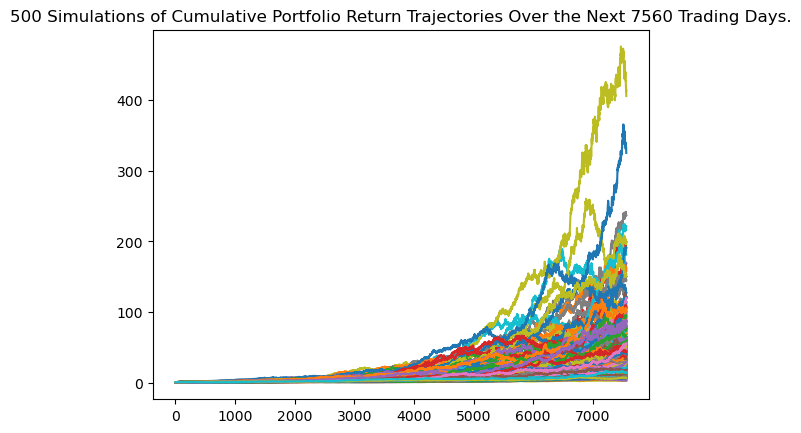

In [13]:
line_plot = MC_XLRE_60.plot_simulation()

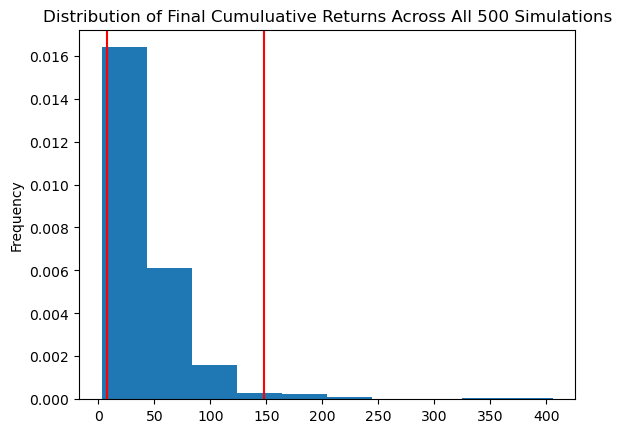

In [14]:
dist_plot = MC_XLRE_60.plot_distribution()

In [15]:
tbl_XLRE_60 = MC_XLRE_60.summarize_cumulative_return()

# YOUR CODE HERE!
print(tbl_XLRE_60)

count           500.000000
mean             42.844020
std              39.318329
min               2.896729
25%              20.524086
50%              31.997594
75%              53.156487
max             405.557695
95% CI Lower      7.458382
95% CI Upper    147.664023
Name: 7560, dtype: float64


In [16]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower= round(tbl_XLRE_60[8]*initial_investment,2)
ci_upper= round(tbl_XLRE_60[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $149167.64 and $2953280.46


In [17]:
# XLRE, XLF, XLK ----- 20, 60, 20 
MC_XLF_60 = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.20,.60,.20],
    num_simulation=500,
    num_trading_days=252*30
)

MC_XLF_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gamez\Documents\fintech\Project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004383,0.990505,0.983397,0.992715,0.999830,0.980486,1.015580,0.997906,1.012230,0.999646,...,0.988057,0.992883,0.999210,1.033995,0.991297,0.989587,1.004374,0.992596,1.022623,0.997100
2,1.013206,0.997355,0.984939,0.987429,0.983861,0.977909,1.034363,1.003927,1.012381,0.997853,...,0.985993,0.996470,0.993386,1.026829,0.997367,0.993059,1.012530,0.990297,1.016026,0.999523
3,0.999871,0.997766,0.982197,0.969348,0.985787,0.967507,1.029352,0.990786,1.002807,1.002661,...,0.984855,1.001640,0.987055,1.003341,0.981922,1.001770,1.005241,0.969173,1.001807,0.984946
4,1.014000,1.009096,0.991885,0.974070,0.973553,0.963884,1.035578,1.008648,0.993432,1.001872,...,0.983689,0.995017,1.001079,1.015144,0.999986,1.017931,1.013222,0.965315,0.991251,0.992028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,85.478285,65.208004,17.243224,70.018855,32.280809,23.368752,48.262706,72.532562,8.289810,18.971440,...,525.373667,76.167118,105.607565,43.942622,32.928777,30.440469,92.898736,41.338113,18.476063,9.057463
7557,85.221049,64.311750,17.307062,69.314760,32.231541,23.779267,48.058170,70.352081,8.382009,18.953048,...,526.251087,75.096717,106.304730,43.767719,32.792967,30.919433,95.147632,41.937592,18.644539,9.076819
7558,84.553648,64.354309,17.286693,70.763787,31.825267,23.985103,48.349821,69.974296,8.295196,18.879546,...,517.649705,74.922053,106.192158,44.397697,32.454117,30.461487,96.013579,41.623723,18.644413,9.092658
7559,85.143974,64.298583,17.306526,72.482500,31.679829,24.095409,48.552796,70.107561,8.423805,18.559497,...,522.247133,74.515783,104.106526,44.273446,33.065059,30.818992,97.106996,41.354374,18.575938,8.894715


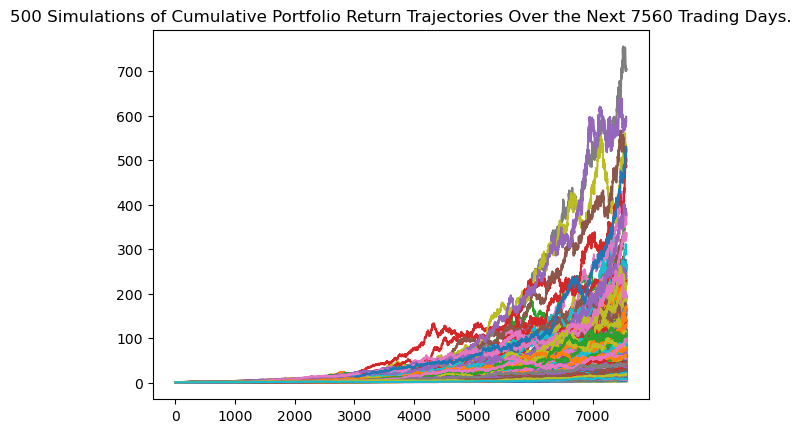

In [18]:
line_plot = MC_XLF_60.plot_simulation()

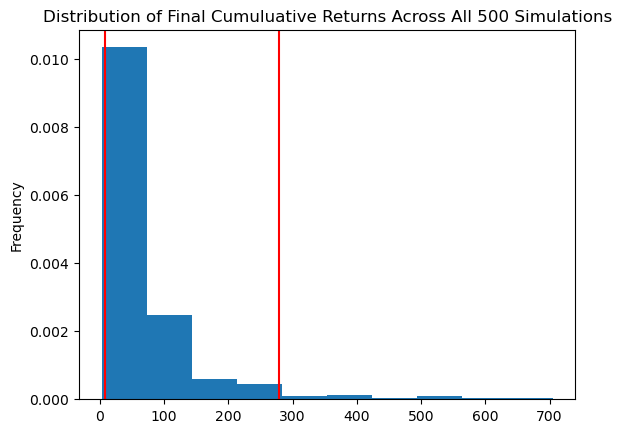

In [19]:
dist_plot = MC_XLF_60.plot_distribution()

In [20]:
tbl_XLF_60 = MC_XLF_60.summarize_cumulative_return()

# YOUR CODE HERE!
print(tbl_XLF_60)

count           500.000000
mean             69.156020
std              82.455124
min               2.664272
25%              24.473296
50%              45.046818
75%              78.868899
max             704.658276
95% CI Lower      7.772643
95% CI Upper    278.043421
Name: 7560, dtype: float64


In [21]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower= round(tbl_XLF_60[8]*initial_investment,2)
ci_upper= round(tbl_XLF_60[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $155452.85 and $5560868.42


In [22]:
# XLRE, XLF, XLK ----- 20, 20, 60 
MC_XLK_60 = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.20,.20,.60],
    num_simulation=500,
    num_trading_days=252*30
)

MC_XLK_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gamez\Documents\fintech\Project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999339,1.013228,1.001466,1.008034,1.002449,1.016003,1.010157,1.014226,0.999178,1.010603,...,1.010938,0.986137,1.004216,1.002582,1.011310,0.998348,0.982107,1.009065,1.000893,1.016091
2,1.005346,1.014989,1.006636,1.002110,1.007000,1.019058,1.011854,1.021781,0.992440,1.011533,...,0.999726,0.989387,1.004006,0.989776,1.002085,0.981364,1.003182,1.019144,1.018001,1.023023
3,1.000467,1.028255,1.020566,1.010555,1.008471,1.032615,1.010548,1.017641,0.995489,0.998460,...,1.004198,1.000069,0.997784,0.993533,0.987702,0.982300,0.997305,1.033467,1.015683,1.026451
4,0.995882,1.015820,1.022039,1.021853,1.031794,1.026676,1.027496,1.024956,1.014023,0.993807,...,0.996613,0.988455,1.018314,0.987284,0.989257,0.966855,0.988497,1.028777,1.023818,1.017445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1260.463408,223.918170,85.787015,281.678408,167.000991,121.975516,234.420307,509.142315,174.031697,276.405271,...,339.696089,277.435071,232.758071,267.350156,795.685511,499.352451,132.341294,259.435748,566.142573,1474.753703
7557,1258.622437,225.249000,85.960478,285.445449,166.343674,122.907024,234.314397,511.983307,172.574110,272.719187,...,338.357184,280.384773,233.464502,265.242622,798.989477,494.061044,133.887571,263.486961,572.224088,1481.962742
7558,1248.887091,227.224423,85.880353,284.922380,165.995638,124.654970,236.248931,509.664530,169.614499,279.689432,...,345.512968,279.181656,236.352139,265.118835,794.022321,496.072129,136.849787,259.436243,582.675757,1459.782693
7559,1249.945708,229.024397,85.958890,288.454355,164.633876,125.756906,238.728697,513.200414,167.807749,280.001681,...,342.995931,281.505161,235.781749,265.918702,798.777558,492.362160,136.523799,260.249823,579.419758,1474.187927


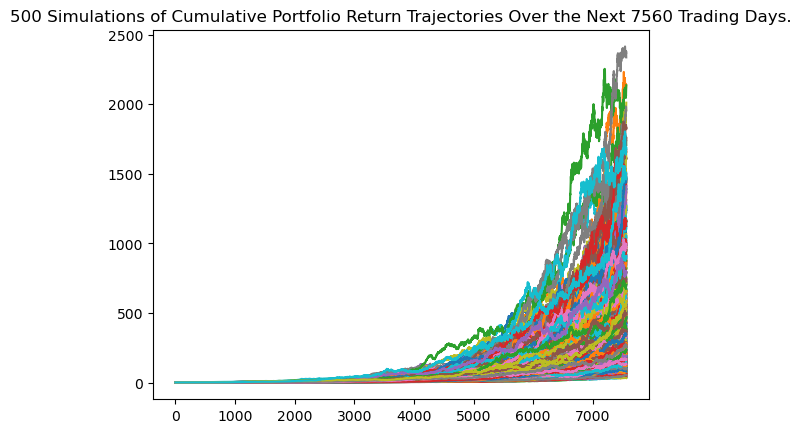

In [23]:
line_plot = MC_XLK_60.plot_simulation()

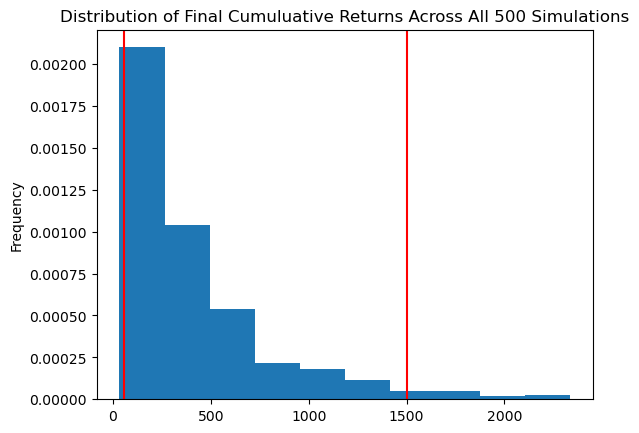

In [24]:
dist_plot = MC_XLK_60.plot_distribution()

In [25]:
tbl_XLK_60 = MC_XLK_60.summarize_cumulative_return()

# YOUR CODE HERE!
print(tbl_XLK_60)

count            500.000000
mean             415.964547
std              391.047275
min               32.821720
25%              159.457095
50%              274.487780
75%              524.484379
max             2337.335539
95% CI Lower      57.757259
95% CI Upper    1503.922614
Name: 7560, dtype: float64


In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower= round(tbl_XLK_60[8]*initial_investment,2)
ci_upper= round(tbl_XLK_60[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1155145.19 and $30078452.29


In [30]:
# XLRE, XLF, XLK ----- 0, 0, 100 
MC_XLK_100 = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.0,.0,1],
    num_simulation=500,
    num_trading_days=252*30
)

MC_XLK_100.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gamez\Documents\fintech\Project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992765,1.018846,1.003904,1.005318,1.009217,1.004908,0.983134,0.964046,0.993931,1.013321,...,1.020136,0.998097,0.981301,0.989299,1.027760,1.018873,1.001636,0.975025,1.020373,0.975174
2,0.981903,0.989947,1.007302,1.036526,1.026240,1.010890,0.982844,0.941540,0.995221,0.992251,...,1.000026,0.992572,0.963888,0.982062,1.024004,1.022827,1.009417,1.001800,1.016983,0.968522
3,0.980360,1.001774,1.015608,1.014282,1.024586,1.011891,0.984060,0.924173,0.998877,0.992564,...,1.007256,0.990860,0.967150,0.990978,1.023412,1.054162,0.974208,1.034759,1.011948,0.954413
4,1.001458,1.022930,1.019822,1.005129,1.056901,0.996495,1.004871,0.921446,0.991979,1.023667,...,1.037080,0.974229,0.974333,0.993275,1.011991,1.038000,0.961347,1.044740,1.040878,0.960715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1262.536035,958.232144,7451.426757,799.844169,435.924976,1862.178855,196.927493,2537.400681,388.563101,95.897785,...,3296.466024,761.377101,2762.714317,426.449818,6178.280198,1734.126169,21618.075551,2141.950937,1070.018535,2136.723325
7557,1235.699141,975.715215,7588.938332,788.175313,420.384775,1839.391823,193.477075,2522.446756,395.883514,94.984787,...,3247.914948,762.895878,2724.533703,428.345930,6063.734289,1714.279939,21995.999037,2151.991267,1054.420796,2085.148163
7558,1223.341203,977.066139,7279.711610,783.889932,422.300126,1828.496148,194.992927,2543.035830,402.534168,95.352907,...,3359.854045,757.734608,2671.657087,438.592686,5967.589349,1686.723597,22589.228113,2127.140098,1076.985427,2135.393544
7559,1230.537378,989.566605,7230.971584,780.513215,413.626571,1808.270576,193.922194,2451.398788,412.471260,96.370536,...,3318.972054,758.060836,2662.954679,442.733626,5973.301087,1640.041826,22964.472764,2157.595445,1074.243576,2151.235380


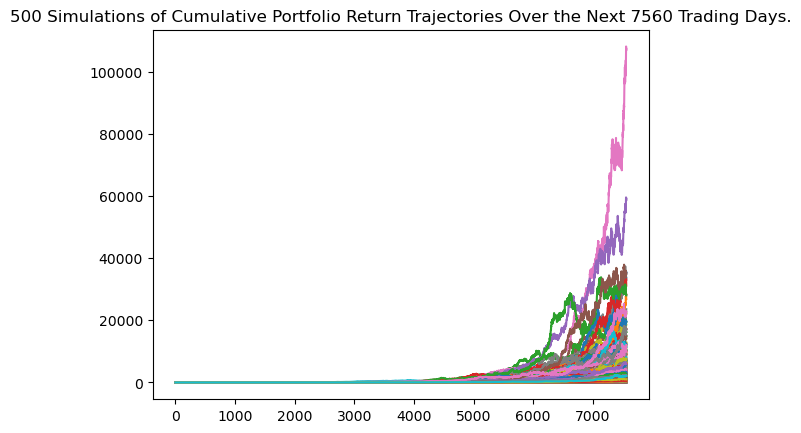

In [31]:
line_plot = MC_XLK_100.plot_simulation()

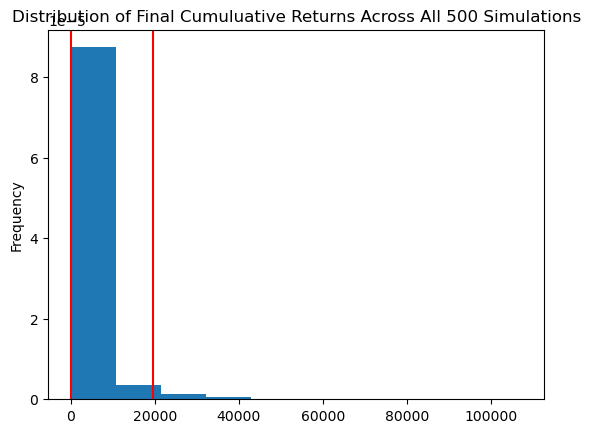

In [32]:
dist_plot = MC_XLK_100.plot_distribution()

In [33]:
tbl_XLK_100 = MC_XLK_100.summarize_cumulative_return()

# YOUR CODE HERE!
print(tbl_XLK_100)

count              500.000000
mean              3435.093153
std               7215.721872
min                 20.055684
25%                590.031130
50%               1432.208983
75%               3448.966463
max             107268.934569
95% CI Lower        99.769104
95% CI Upper     19535.855242
Name: 7560, dtype: float64


In [34]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower= round(tbl_XLK_100[8]*initial_investment,2)
ci_upper= round(tbl_XLK_100[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1995382.07 and $390717104.85
